In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
files_r2 = glob.glob('r2_*.csv')
r2_ = [pd.read_csv(f) for f in files_r2]
r2_all = pd.concat(r2_, ignore_index=True)

In [8]:
r2_all.sort_values(
    by=['metric','score'],
    ascending=[True, False]
)

,index,model,metric,score
13,1,CatBoost,Best_Tuned_R2,0.946583
10,1,GradientBoosting,Best_Tuned_R2,0.939563
7,1,LightGBM,Best_Tuned_R2,0.933937
1,1,Ridge,Best_Tuned_R2,0.929130
4,1,RandomForest,Best_Tuned_R2,0.913890
14,2,CatBoost,Final_CV_mean_R2,0.928780
8,2,LightGBM,Final_CV_mean_R2,0.920263
11,2,GradientBoosting,Final_CV_mean_R2,0.918811
2,2,Ridge,Final_CV_mean_R2,0.907211
5,2,RandomForest,Final_CV_mean_R2,0.900399


In [3]:
# files_shap = glob.glob('shap_importance_*.csv')
# shap_ = [pd.read_csv(f) for f in files_shap]
# shap_all = pd.concat(shap_, ignore_index=True)

<Axes: xlabel='metric', ylabel='score'>

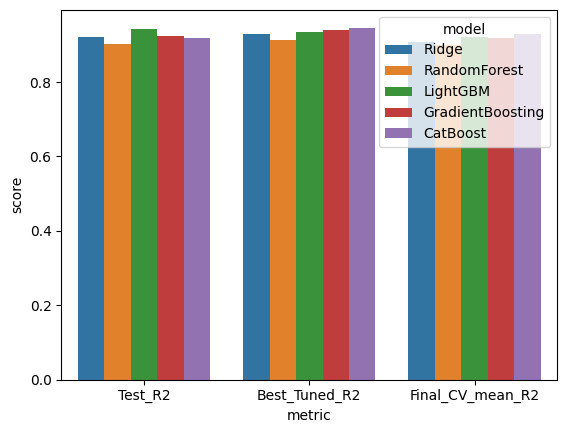

In [6]:
sns.barplot(data=r2_all, x="metric", y="score", hue="model", errorbar=None)

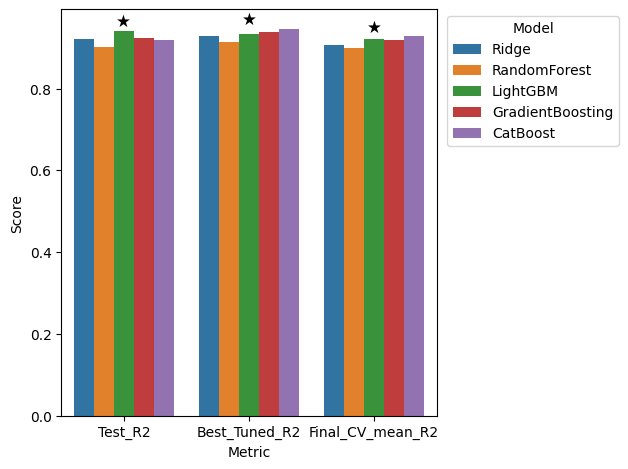

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(data=r2_all, x="metric", y="score", hue="model", errorbar=None)

# annotate the best model for each metric
winners = r2_all.loc[r2_all.groupby("metric")["score"].idxmax()]
for _, r in winners.iterrows():
    ax.annotate("★", (r["metric"], r["score"]), ha="center", va="bottom", fontsize=12)

ax.set_ylabel("Score"); ax.set_xlabel("Metric")
plt.legend(title="Model", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:

ax = sns.barplot(data=r2_all, x="metric", y="score", hue="model", errorbar=None)

# annotate the best model for each metric
winners = df.loc[df.groupby("metric")["score"].idxmax()]
for _, r in winners.iterrows():
    ax.annotate("★", (r["metric"], r["score"]), ha="center", va="bottom", fontsize=12)

ax.set_ylabel("Score"); ax.set_xlabel("Metric")
plt.legend(title="Model", bbox_to_anchor=(1.01, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [5]:
shap_all

,index,feature,mean_abs_shap_rf_5fk,mean_abs_shap_lgbm_5fk,mean_abs_shap_gbr_5fk,mean_abs_shap_ridge_5fk,mean_abs_shap_cb_5fk
0,3,OverallQual,24116.861009,NaN,NaN,NaN,NaN
1,0,GrLivArea,17536.207178,NaN,NaN,NaN,NaN
2,6,TotalBsmtSF,7676.761671,NaN,NaN,NaN,NaN
3,37,ExterQual_ordinal,2765.316646,NaN,NaN,NaN,NaN
4,2,LotArea,2460.710939,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1006,23,Heating,NaN,NaN,NaN,NaN,21.176793
1007,5,Street,NaN,NaN,NaN,NaN,12.921870
1008,9,Utilities,NaN,NaN,NaN,NaN,5.021149
1009,51,GarageQual_ordinal,NaN,NaN,NaN,NaN,2.553397
